In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
ins=pd.read_csv('DS2_C6_S1_Insurance_Data_Challenge.csv')
ins2=ins

In [3]:
ins.shape

(1338, 7)

In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
ins[['sex','smoker','region']].astype('category')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [10]:
cat=['sex','smoker','region']

In [11]:
for i in cat:
    ins[i]=ins[i].astype('category')
ins[cat].dtypes

sex       category
smoker    category
region    category
dtype: object

In [12]:
label_encoder = preprocessing.LabelEncoder()
cat_n=[]
for i in cat:
    ins[str(i)+'_n']=label_encoder.fit_transform(ins[i])
    cat_n.append(str(i)+'_n')
ins[cat_n[0]].unique()

array([0, 1])

In [13]:
ins.merge(ins[cat_n])

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
1,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
2,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
3,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
4,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
...,...,...,...,...,...,...,...,...,...,...
151825,61,female,29.07,0,yes,northwest,29141.3603,0,1,1
151826,61,female,29.07,0,yes,northwest,29141.3603,0,1,1
151827,61,female,29.07,0,yes,northwest,29141.3603,0,1,1
151828,61,female,29.07,0,yes,northwest,29141.3603,0,1,1


In [22]:
ins_num=ins.select_dtypes(include=['int64','float64'])
ins_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [23]:
num=list(ins.select_dtypes(include=['int64','float64']).columns)
num

['age', 'bmi', 'children', 'charges']

In [24]:
def featurescaling(scale):
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    ins_scale = pd.DataFrame(scaler.fit_transform(ins_num.to_numpy()), columns = ins_num.columns)
    return ins_scale

In [25]:
scaler=MinMaxScaler()
ins_scale=featurescaling('minmax')
ins_scale

,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


In [26]:
inscorr=ins_num.corr()
inscorr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


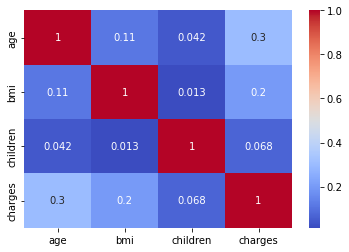

In [27]:
new_ins=ins_scale[num]
inscorr=sns.heatmap(new_ins.corr(),annot=True,cmap='coolwarm')

In [29]:
y=ins2['charges']
X=ins2

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 20)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 10)
(402, 10)
(936,)
(402,)


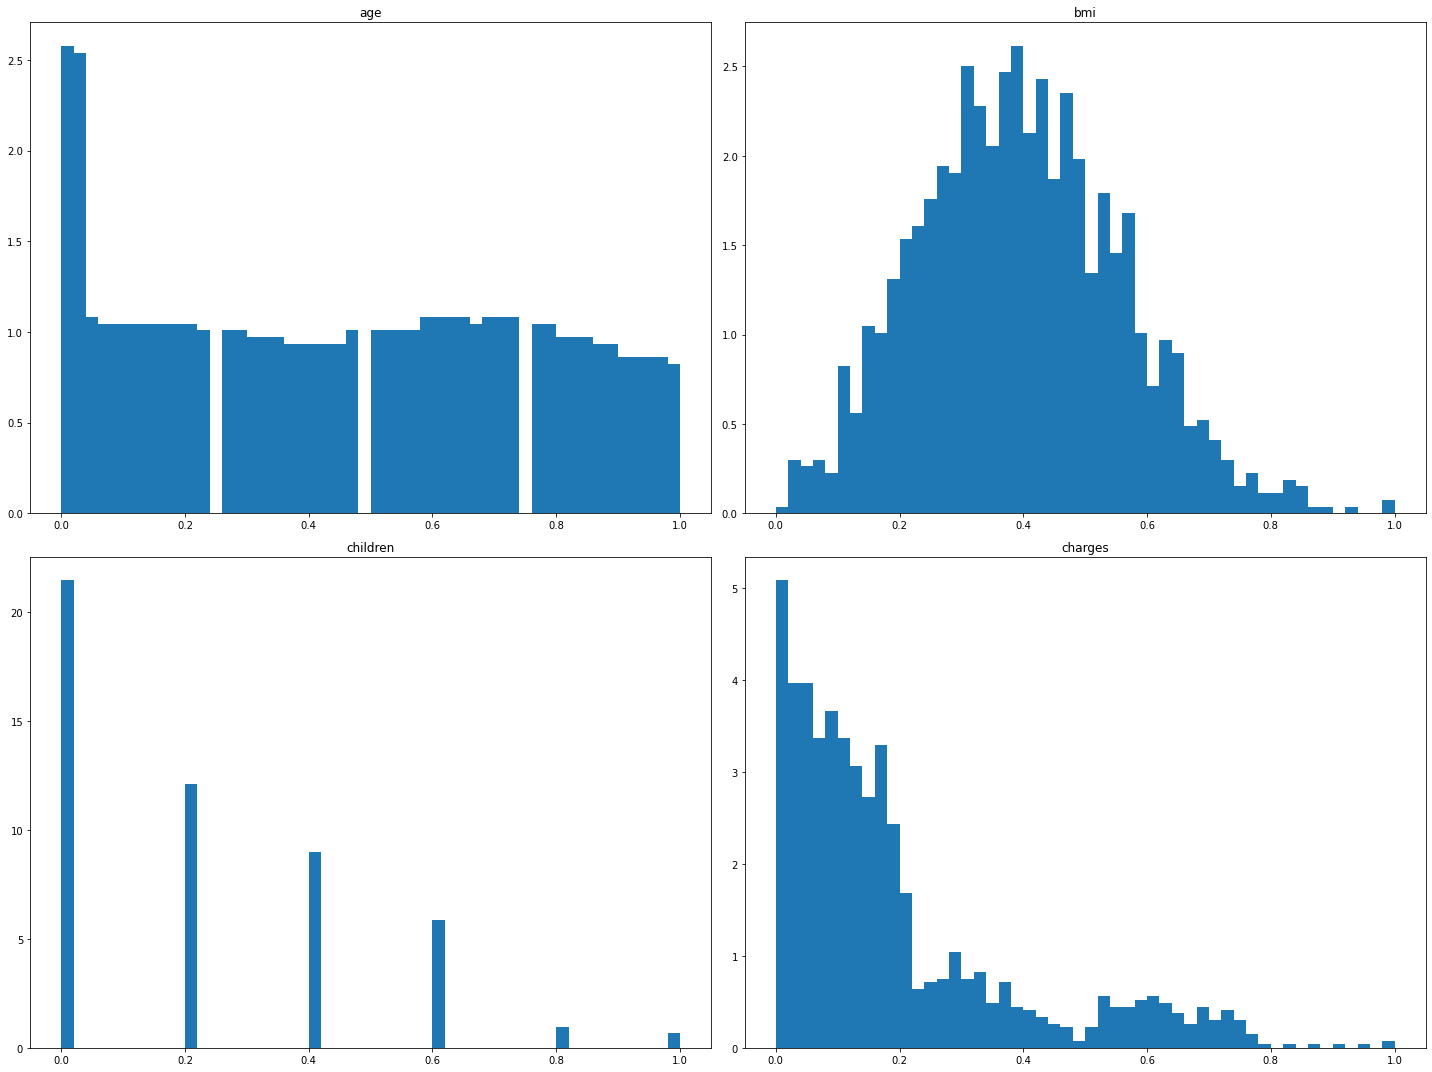

In [33]:
numeric_Col = new_ins.columns
num_cols= 4
n_bins = 50

num_rows = int(len(numeric_Col )/num_cols)+1

fig, axs = plt.subplots(2,2,tight_layout = True, figsize= (20,15))

for col, ax in zip(numeric_Col, axs.flatten()[:len(numeric_Col)]):
    ax.hist(new_ins[col], bins = n_bins, density= True)
    ax.set_title(col)
plt.show()

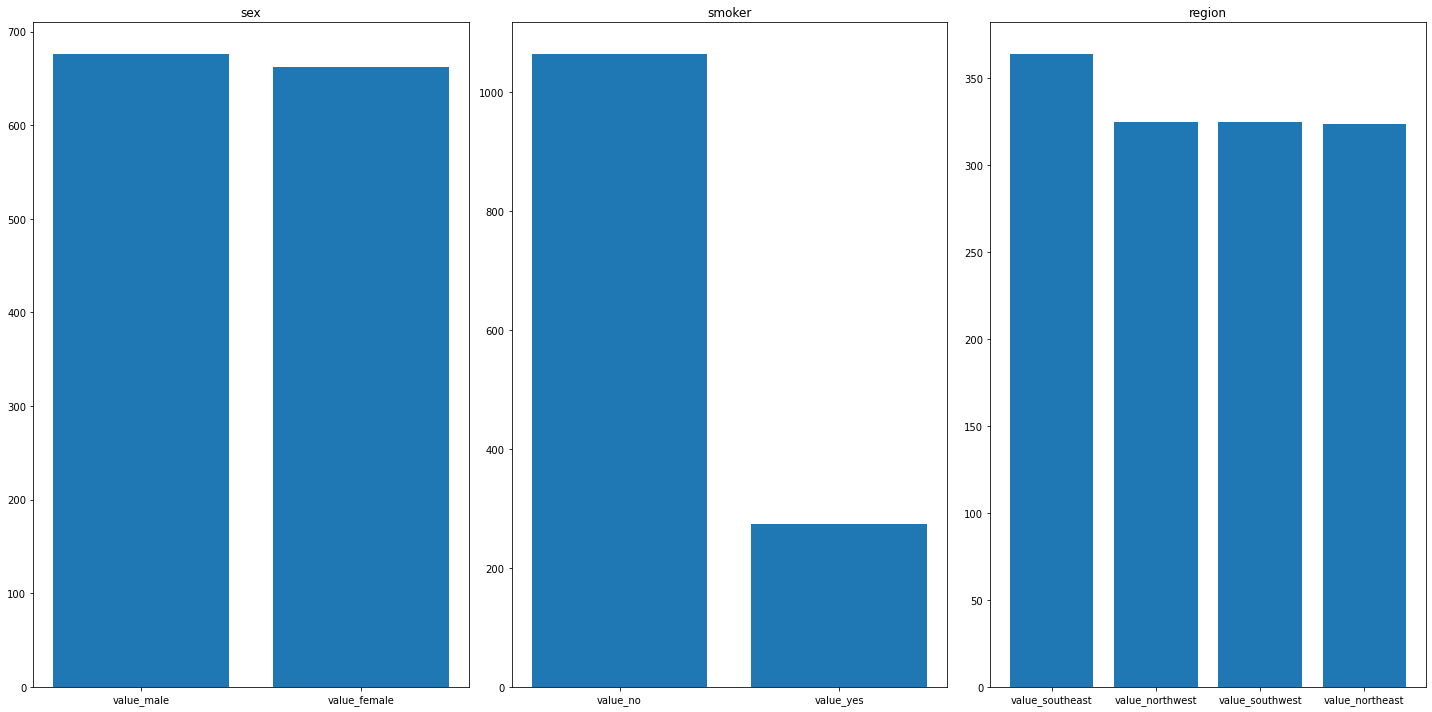

In [36]:
num_cols= 4
cat_ins = ins[cat]

num_rows = int(len(cat)/num_cols)

fig, axs = plt.subplots(1,3, tight_layout = True, figsize= (20,10))

for col, ax in zip(cat, axs.flatten()[:len(cat)]):
    stats = cat_ins[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_', str(x))), list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
plt.show()